## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import bokeh
import matplotlib as mpl
from matplotlib import rcParams, rc
import matplotlib.colors as mcolors


## Make it pretty

In [2]:
import matplotlib as mpl

mpl.rc('figure',
       titlesize=24,
       figsize=(12,10),
      dpi=250,
      edgecolor='black',
    facecolor='white'
      )

mpl.rcParams['font.family'] = 'Arial' # 'sans-serif' , 'cursive' , 'fantasy','monospace' (e.g., Courier)

mpl.rc('lines',
       linewidth=2,
       color='r',
      linestyle='-',
      markersize=6,
      dash_joinstyle='miter', # miter/round/bevel
      dash_capstyle='butt',  #butt/round/projecting
      solid_joinstyle='miter',
      solid_capstyle='projecting',
      dashed_pattern= (2.8, 1.2),
       dashdot_pattern= (4.8, 1.2, 0.8, 1.2),
       dotted_pattern = (1.1, 1.1),
       scale_dashes = True
      )

mpl.rc('legend',
      fancybox=True, # if True, use a rounded box for the
      numpoints=1, # the number of marker points in the legend line
      markerscale =1,
      fontsize = 'medium',
      borderaxespad = 0.5) # the border between the axes and legend edge
             
mpl.rc('axes',
      facecolor='white',
      edgecolor='black',
      linewidth=1.9,
      grid=False,
      titlesize='large',
      labelsize='large',
      labelcolor='black',
      axisbelow='False') #draw axis gridlines and ticks below, patches (True); above patches but below, lines ('line'); or above all (False) 

mpl.rc('grid',
        color= 'lightgray',
       linestyle=':',
       linewidth=.6,
       alpha=.8)

mpl.rc('xtick',
      top=True, 
      bottom=True, 
      color ='k',
      labelsize = 'medium',
      direction = 'in') 

mpl.rc('xtick.major',
      size=3.5,
      width=1.2,
      pad=3.5,
      top=True,
      bottom=True)

mpl.rc('xtick.minor',
      size=2,
      width=0.8,
      pad=3.4,
      top=True,
      bottom=True)

mpl.rc('ytick',
      right=False, 
      left=True, 
      color ='k',
      labelsize = 'medium',
      direction = 'in') 

mpl.rc('ytick.major',
      size=3.5,
      width=1.2,
      pad=3.5,
      left=True,
      right=True)

mpl.rc('ytick.minor',
      size=2,
      width=0.8,
      pad=3.4,
      left=True,
      right=True)

In [3]:

fontsize = 14
rcParams['axes.linewidth'] =    2
rcParams['xtick.major.size'] =  6
rcParams['xtick.major.width'] = 2
rcParams['xtick.minor.size'] =  3
rcParams['xtick.minor.width'] = 2
rcParams['ytick.major.size'] =  6
rcParams['ytick.major.width'] = 2
rcParams['ytick.minor.size'] =  3
rcParams['ytick.minor.width'] = 2
font = {'size' : fontsize, 'weight' : 'bold'}
rc('font', **font)


## Graph One

/home/imalsky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/imalsky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/imalsky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/imalsky/anaconda3/lib/python3.7/site-packag

/home/imalsky/Desktop/SPECTRA/Spec_0_UPS-LOW-G-COM-CLOUDY-250_phase_0.0_inc_0.0000.00.dat
/home/imalsky/Desktop/SPECTRA/Spec_0_UPS-LOW-G-COM-CLOUDY-250_phase_60.0_inc_0.0000.00.dat
/home/imalsky/Desktop/SPECTRA/Spec_0_UPS-LOW-G-COM-CLOUDY-250_phase_120.0_inc_0.0000.00.dat
/home/imalsky/Desktop/SPECTRA/Spec_0_UPS-LOW-G-COM-CLOUDY-250_phase_180.0_inc_0.0000.00.dat


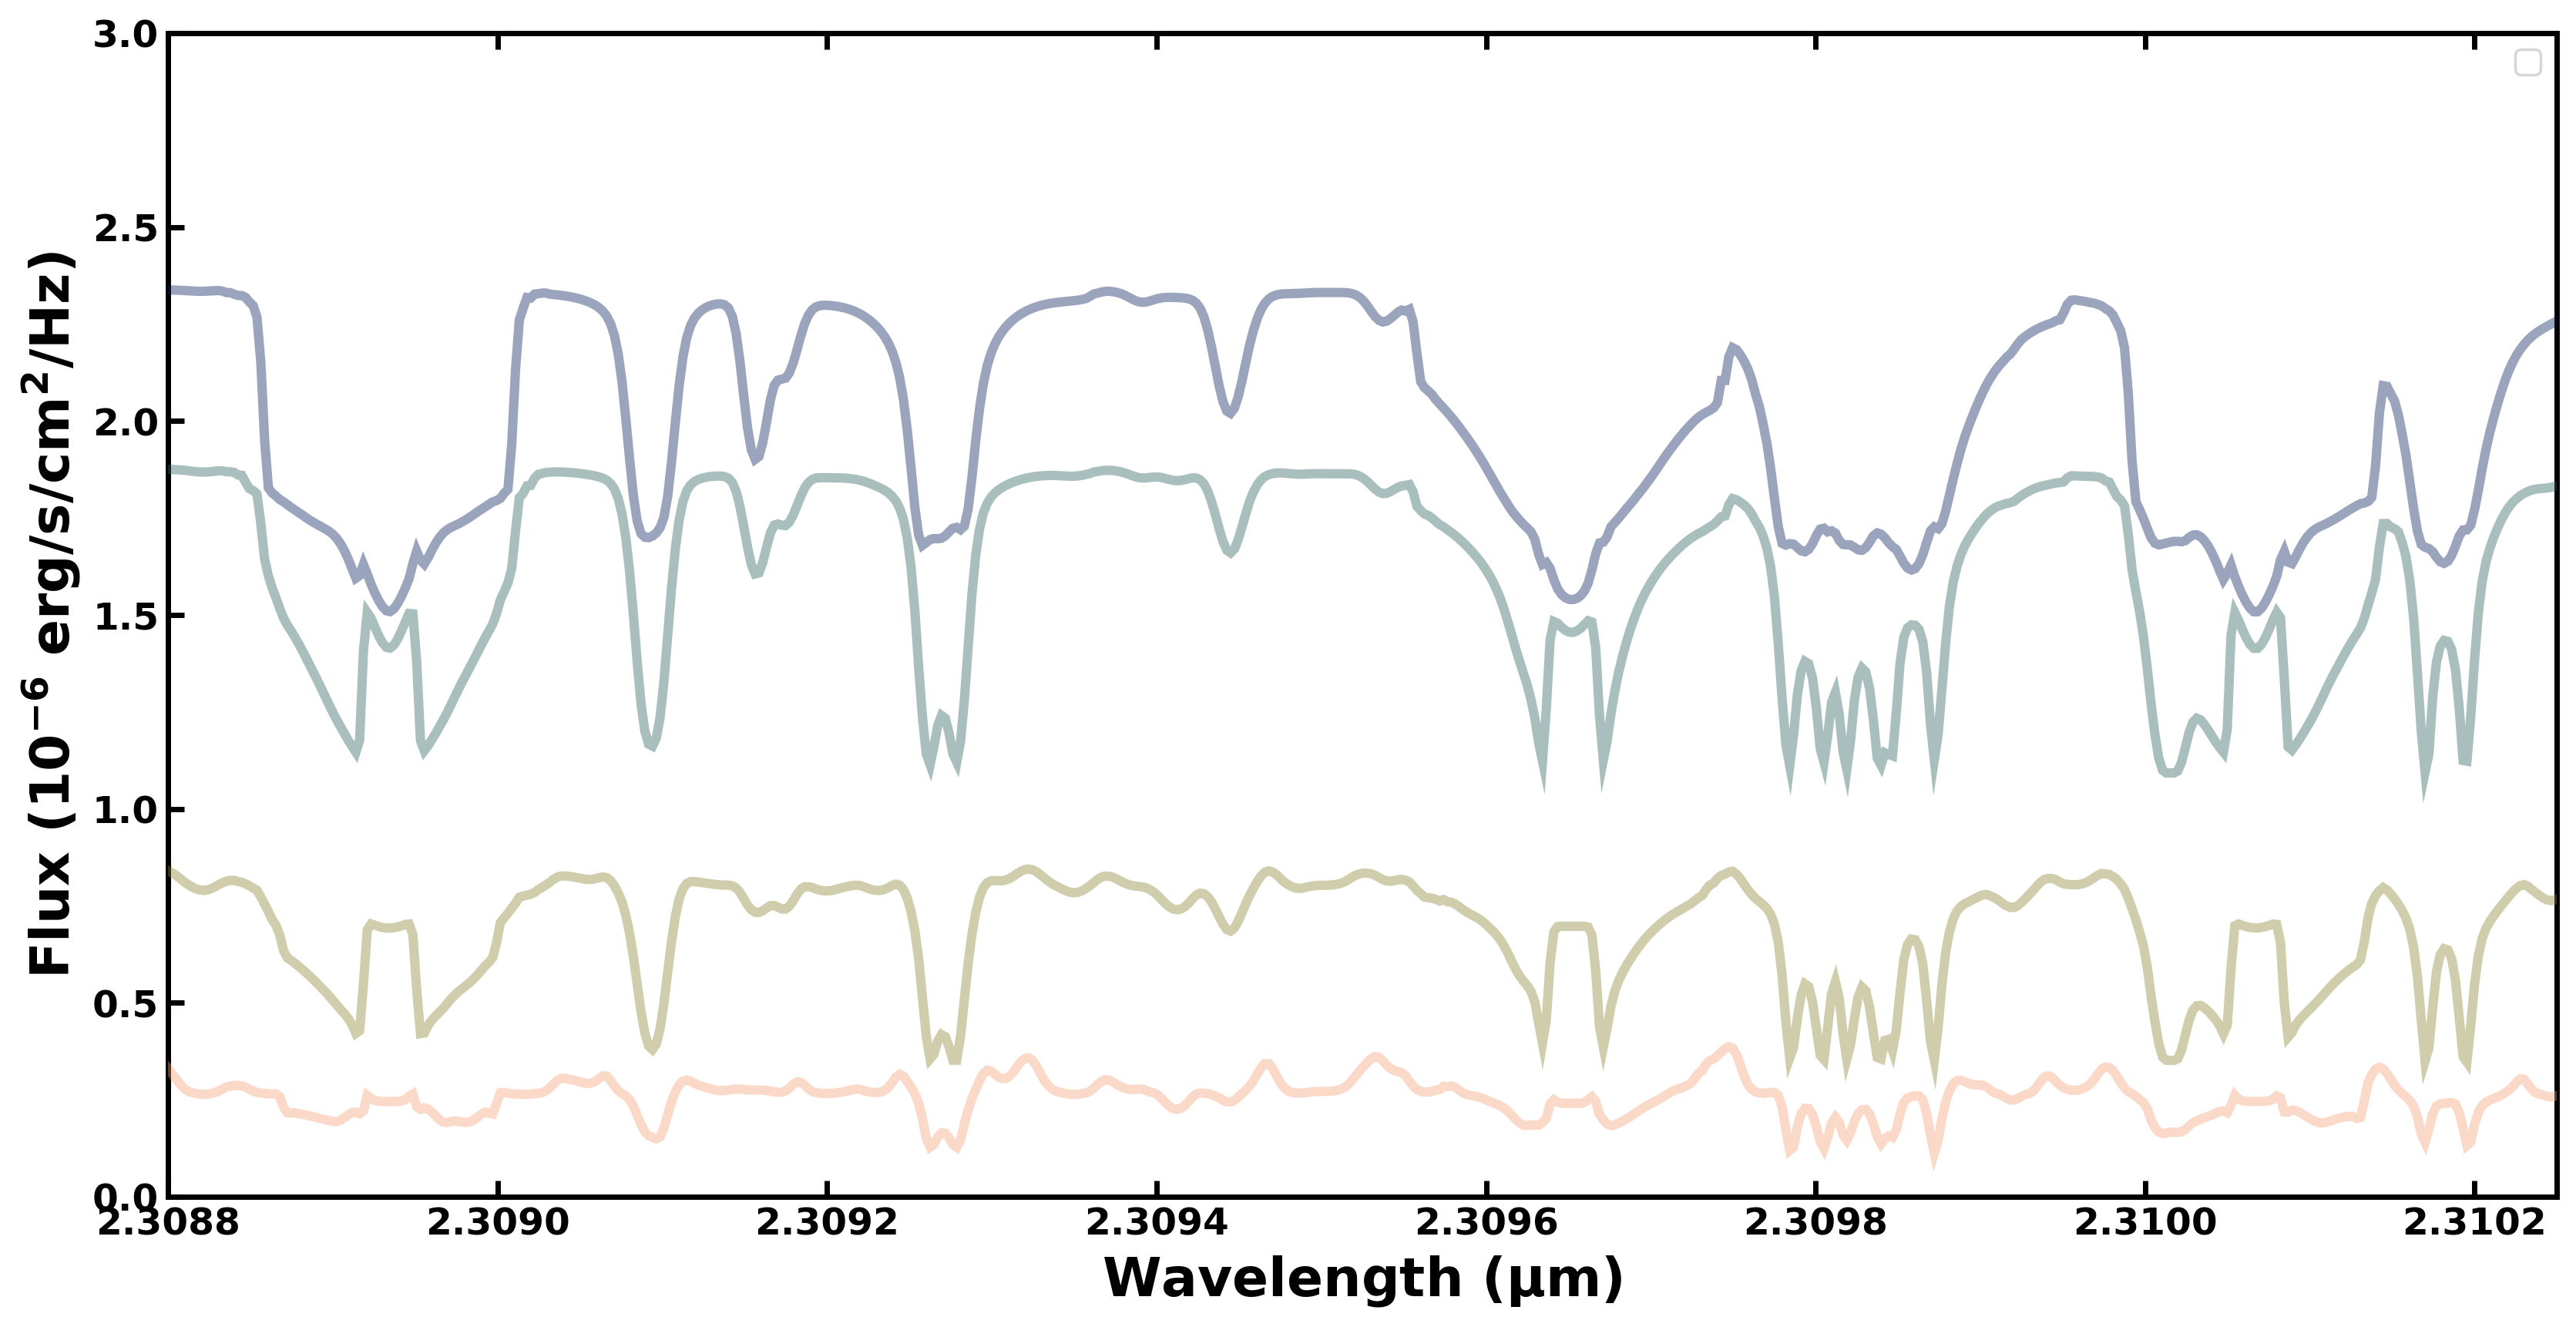

In [7]:
# Figure aesthetics
plt.figure(figsize=(16, 8))




models = ['UPS-LOW-G-CLEAR-250', 'UPS-LOW-G-COM-CLOUDY-250', 'UPS-LOW-G-EXT-CLOUDY-250']
models = ['UPS-LOW-G-COM-CLOUDY-250']


#inclinations = ['0.0', '0.3925', '0.79', '1.1775', '1.57']
inclinations = ['0.0',  '0.79', '1.57']
inclinations = ['0.0']


files = ['/home/imalsky/Desktop/SPECTRA/Spec_{}_{}_phase_0.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/SPECTRA/Spec_{}_{}_phase_60.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/SPECTRA/Spec_{}_{}_phase_120.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/SPECTRA/Spec_{}_{}_phase_180.0_inc_{}000.00.dat']

labels = ['0', '60', '120', '180']


#buda, batlow, roma
cm_name = 'batlow'
cm_file = np.loadtxt(f'ScientificColourMaps5/{cm_name}/{cm_name}.txt')
my_colors = mcolors.LinearSegmentedColormap.from_list(cm_name, cm_file[::-1])

num_lines = len(labels)
colors = np.linspace(60, 250, num_lines)

for model in models:
    for inc in inclinations:

        i = 0
        for file in files:

            data_no_doppler = file.format('0',model, inc)
            print (data_no_doppler)

            #spectra0 = pd.read_csv(data_no_doppler, header=None, sep="\s+|\t+|\s+\t+|\t+\s+", names=['Wavelength','Flux'])
            #plt.plot(spectra0['Wavelength'][10:-10] * 1e6, 1e9 * spectra0['Flux'][10:-10], linewidth=5,
            #         linestyle='solid', color='black', zorder=3, alpha=0.2)


            #spectra0 = pd.read_csv(data_no_doppler, header=None, sep="\s+|\t+|\s+\t+|\t+\s+", names=['Wavelength','Flux'])
            #plt.plot(spectra0['Wavelength'][10:-10] * 1e6, 1e9 * spectra0['Flux'][10:-10], linewidth=5,
            #         linestyle='solid', color='black', zorder=4, alpha=1)


            spectra0 = pd.read_csv(data_no_doppler, header=None, sep="\s+|\t+|\s+\t+|\t+\s+", names=['Wavelength','Flux'])
            plt.plot(spectra0['Wavelength'][10:-10] * 1e6, 1e9 * spectra0['Flux'][10:-10], linewidth=3.5,
                     linestyle='solid', color=my_colors(int(colors[i])), zorder=4, alpha=0.4)

            
            #data_doppler = file.format('0', model, inc)

            #spectra1 = pd.read_csv(data_doppler, header=None, sep="\s+|\t+|\s+\t+|\t+\s+", names=['Wavelength','Flux'])
            #plt.plot(spectra1['Wavelength'][10:-10] * 1e6, 1e9 * spectra1['Flux'][10:-10], linewidth=4.5,
            #         linestyle='solid', color='black', zorder=1)


            #spectra1 = pd.read_csv(data_doppler, header=None, sep="\s+|\t+|\s+\t+|\t+\s+", names=['Wavelength','Flux'])
            #plt.plot(spectra1['Wavelength'][10:-10] * 1e6, 1e9 * spectra1['Flux'][10:-10], linewidth=4,
            #         linestyle='solid', color=my_colors(int(colors[i])), zorder=2, label=labels[i])  
            
            i = i + 1

        plt.legend(fontsize=12, loc='upper right')
        plt.ylim([0.0, 3])
        plt.xlim([2.3088, 2.31025])
        #plt.xlabel(r'Wavelength ($\mathbold{\mu m}$)', fontsize=16, weight='bold')
        plt.xlabel(r"Wavelength ($\mathbf{\mu m}$)", fontsize=20, weight='bold')

        plt.ylabel(r"Flux ($\mathbf{10^{-6} \ erg/s/cm^2/Hz}$)", fontsize=20, weight='bold')
        plt.savefig('/home/imalsky/Desktop/images2/one.png', dpi=250, bbox_inches='tight')

        #plt.savefig('/home/imalsky/Desktop/images2/dop_{}_{}000.00.png'.format(model, inc), dpi=250, bbox_inches='tight')
        #plt.clf()